# Task
Analyze the provided training data ("/content/Train_set.csv"), test data ("/content/Test_set.csv"), and data dictionary ("/content/Data_Dictionary_(1).csv") to predict loan defaults. Perform comprehensive EDA, handle missing values, outliers, duplicates, and skewness. Apply feature engineering and appropriate categorical encoding. Create and save a preprocessing pipeline ("preprocessing.pkl"). Train multiple classification models, tune the top 3, select the best model, and generate a submission file in the format of "/content/Sample_Submission.csv" with 'ID' and 'default' columns.

## Load the datasets

### Subtask:
Load the training, testing, and sample submission datasets into pandas DataFrames.


**Reasoning**:
The first step is to load the necessary libraries and datasets into pandas DataFrames as per the instructions.



In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/Train_set.csv')
test_df = pd.read_csv('/content/Test_set.csv')

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Train DataFrame shape: (93174, 23)
Test DataFrame shape: (39933, 22)


## Eda

### Subtask:
Perform intelligent EDA to understand the data distribution, identify outliers, missing values, and duplicates. Analyze the correlation between features and the target variable.


**Reasoning**:
Display the first few rows, get a concise summary, and generate descriptive statistics for the training and test dataframes to understand their structure, data types, non-null values, and numerical distributions.



In [ ]:
print("First few rows of train_df:")
display(train_df.head())

print("\nFirst few rows of test_df:")
display(test_df.head())

print("\nConcise summary of train_df:")
train_df.info()

print("\nConcise summary of test_df:")
test_df.info()

print("\nDescriptive statistics for train_df:")
display(train_df.describe())

print("\nDescriptive statistics for test_df:")
display(test_df.describe())

First few rows of train_df:


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0



First few rows of test_df:


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0



Concise summary of train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  d

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174.000000,9.317300e+04,93174.000000,93172.000000,93172.000000,9.317400e+04,93172.000000,93174.000000,91250.000000,8.578800e+04,8.578800e+04,93174.000000
mean,3.505021e+07,14733.861378,13.233433,7.502826e+04,18.127623,0.316994,0.196121,1.685447e+04,25.248905,1747.263530,58.154882,1.392529e+05,3.208590e+04,0.237502
std,2.414926e+07,8428.184858,4.368728,6.945478e+04,8.563084,0.880859,0.581188,2.368907e+04,11.855061,2088.236141,44.326560,1.576868e+05,4.705251e+04,0.425555
min,7.073500e+04,500.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085983e+07,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,6.433000e+03,17.000000,439.880000,22.000000,2.964200e+04,1.400000e+04,0.000000
50%,3.710751e+07,13000.000000,12.990000,6.400000e+04,17.640000,0.000000,0.000000,1.185600e+04,24.000000,1070.755000,48.000000,7.936350e+04,2.370000e+04,0.000000
75%,5.859895e+07,20000.000000,16.200000,9.000000e+04,23.890000,0.000000,0.000000,2.074500e+04,32.000000,2219.612500,83.000000,2.071600e+05,3.970000e+04,0.000000
max,7.351975e+07,35000.000000,28.990000,9.500000e+06,672.520000,22.000000,49.000000,2.560703e+06,119.000000,23172.310000,291.000000,8.000078e+06,9.999999e+06,1.000000



Descriptive statistics for test_df:


,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit
count,3.993300e+04,39933.000000,39933.000000,3.993300e+04,39933.000000,39932.000000,39932.000000,3.993300e+04,39932.000000,39933.000000,39127.000000,3.670300e+04,3.670300e+04
mean,3.481149e+07,14781.987329,13.219258,7.526480e+04,18.121058,0.312256,0.191526,1.701928e+04,25.264825,1764.743917,58.418177,1.404625e+05,3.245321e+04
std,2.421750e+07,8427.845431,4.392109,5.655666e+04,8.487992,0.854545,0.557824,2.612974e+04,11.768501,2095.443444,44.476130,1.565759e+05,6.183545e+04
min,7.430100e+04,500.000000,5.320000,3.300000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.075172e+07,8000.000000,9.990000,4.526200e+04,11.960000,0.000000,0.000000,6.482000e+03,17.000000,441.470000,22.000000,2.980700e+04,1.400000e+04
50%,3.680509e+07,13000.000000,12.990000,6.500000e+04,17.610000,0.000000,0.000000,1.194900e+04,24.000000,1077.720000,48.000000,8.059000e+04,2.390000e+04
75%,5.845998e+07,20000.000000,16.200000,9.000000e+04,23.880000,0.000000,0.000000,2.092800e+04,32.000000,2260.990000,83.000000,2.095905e+05,4.010000e+04
max,7.351969e+07,35000.000000,28.990000,5.000000e+06,380.530000,17.000000,23.000000,2.568995e+06,114.000000,21811.290000,278.000000,3.881449e+06,9.999999e+06


**Reasoning**:
Check for duplicate rows and calculate the percentage of missing values in both dataframes.



In [ ]:
print("Number of duplicate rows in train_df:", train_df.duplicated().sum())
print("Number of duplicate rows in test_df:", test_df.duplicated().sum())

print("\nPercentage of missing values in train_df:")
print(train_df.isnull().sum() / len(train_df) * 100)

print("\nPercentage of missing values in test_df:")
print(test_df.isnull().sum() / len(test_df) * 100)

Number of duplicate rows in train_df: 0
Number of duplicate rows in test_df: 0

Percentage of missing values in train_df:
ID                            0.000000
loan_amnt                     0.000000
loan_term                     0.000000
interest_rate                 0.000000
loan_grade                    0.000000
loan_subgrade                 0.000000
job_experience                5.046472
home_ownership                0.000000
annual_income                 0.001073
income_verification_status    0.000000
loan_purpose                  0.000000
state_code                    0.000000
debt_to_income                0.000000
delinq_2yrs                   0.002147
public_records                0.002147
revolving_balance             0.000000
total_acc                     0.002147
interest_receive              0.000000
application_type              0.000000
last_week_pay                 2.064954
total_current_balance         7.927104
total_revolving_limit         7.927104
default             

**Reasoning**:
Analyze the distribution of the target variable in the training data and visualize it.




Distribution of the target variable ('default') in train_df:


,count
default,
0,71045
1,22129


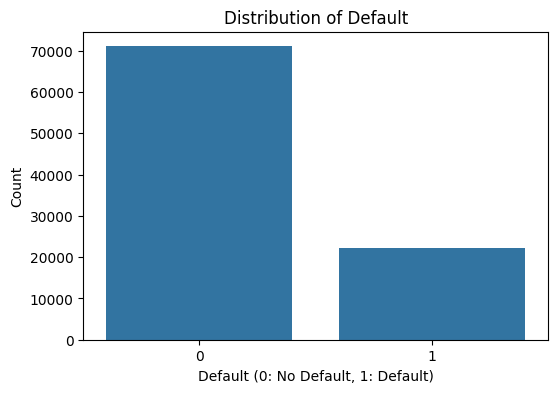

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDistribution of the target variable ('default') in train_df:")
display(train_df['default'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=train_df)
plt.title('Distribution of Default')
plt.xlabel('Default (0: No Default, 1: Default)')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Explore unique values and their counts for categorical columns and visualize the distribution of key numerical features in the training data.




Unique values and counts for categorical columns in train_df:

Column: loan_term


,count
loan_term,
3 years,65211
5 years,27963



Column: loan_grade


,count
loan_grade,
B,26865
C,25787
A,15534
D,14715
E,7378
F,2344
G,551



Column: loan_subgrade


,count
loan_subgrade,
B4,5879
B3,5879
C2,5479
C1,5443
C3,5270
C4,5182
B2,5169
B5,5095
B1,4843



Column: job_experience


,count
job_experience,
<5 Years,40610
10+ years,30362
6-10 years,17500



Column: home_ownership


,count
home_ownership,
MORTGAGE,46445
RENT,37449
OWN,9254
OTHER,18
NONE,8



Column: income_verification_status


,count
income_verification_status,
Source Verified,34487
Verified,30450
Not Verified,28237



Column: loan_purpose


,count
loan_purpose,
debt_consolidation,55241
credit_card,21571
other,10971
home_improvement,5391



Column: state_code


,count
state_code,
CA,13744
NY,7782
TX,7467
FL,6360
IL,3699
NJ,3464
PA,3321
OH,3104
GA,2998



Column: application_type


,count
application_type,
INDIVIDUAL,93118
JOINT,56



Distribution of key numerical features in train_df:


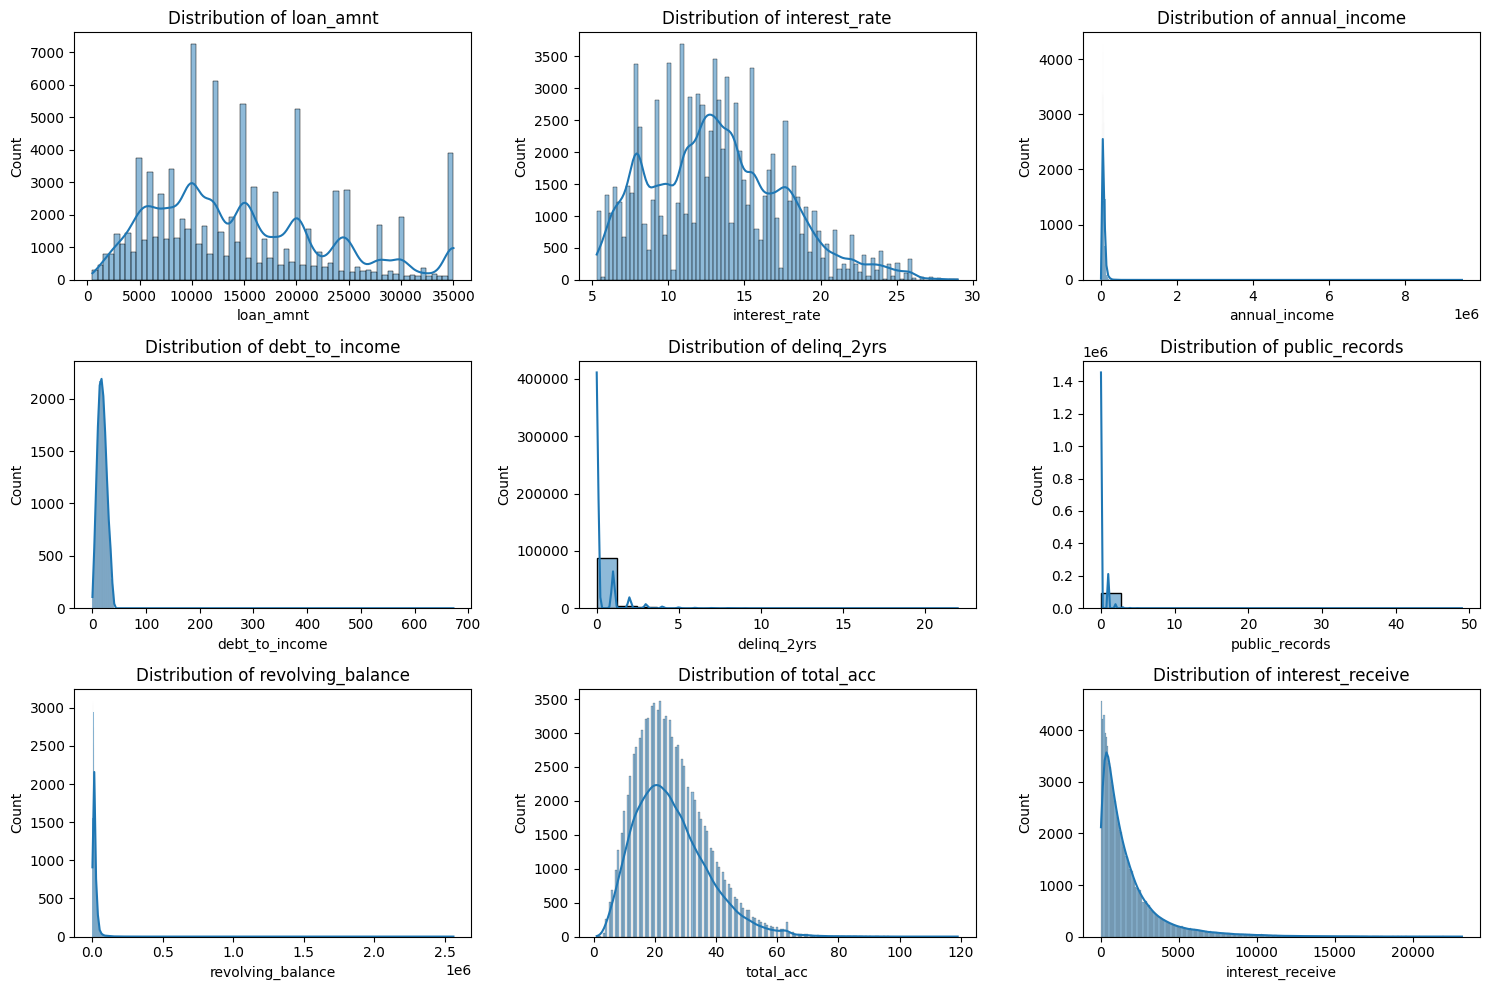

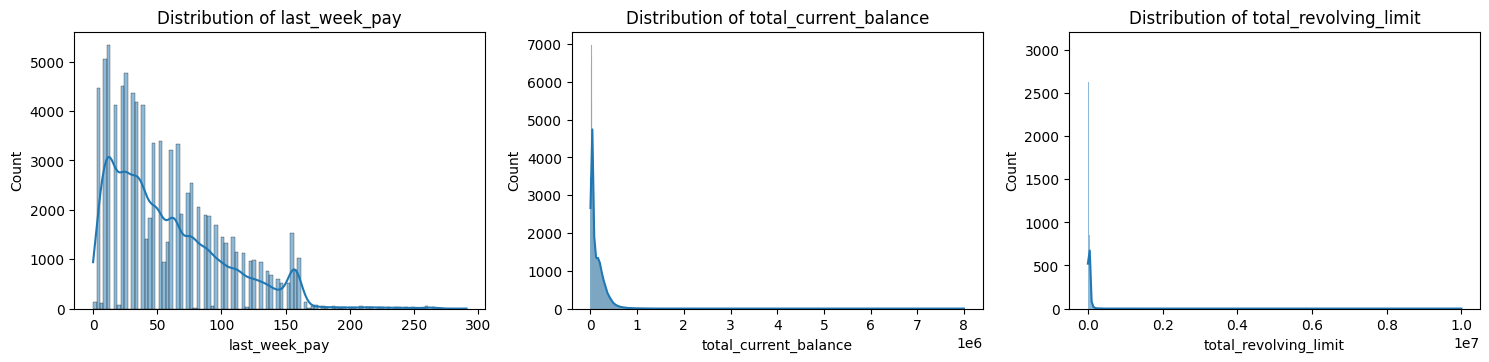

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns
print("\nUnique values and counts for categorical columns in train_df:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(train_df[col].value_counts())

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID', 'default'])
print("\nDistribution of key numerical features in train_df:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:9]): # Plotting a subset for brevity
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[9:]): # Plotting the remaining subset
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
Calculate and visualize the correlation matrix for numerical features and analyze the relationship between categorical features and the target variable in the training data.




Correlation matrix for numerical features in train_df:


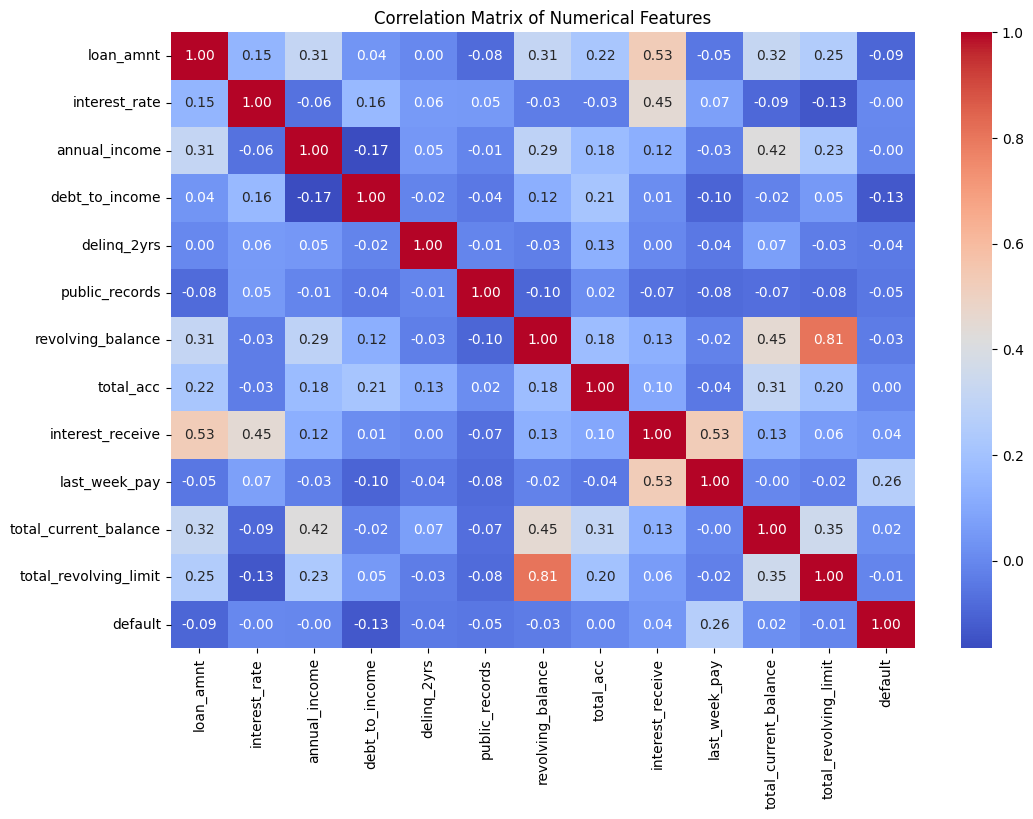


Relationship between categorical features and the target variable in train_df:


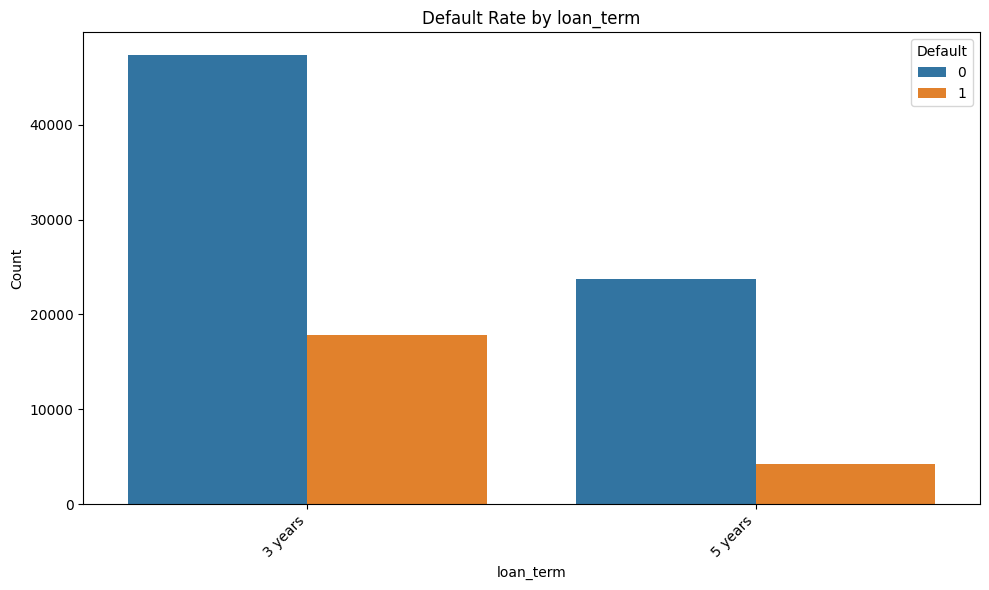

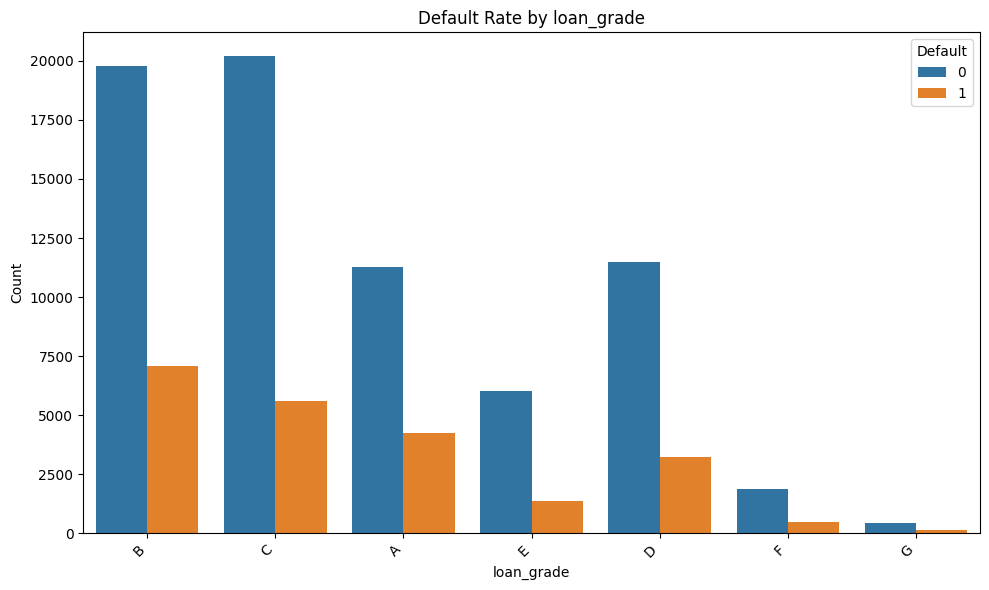

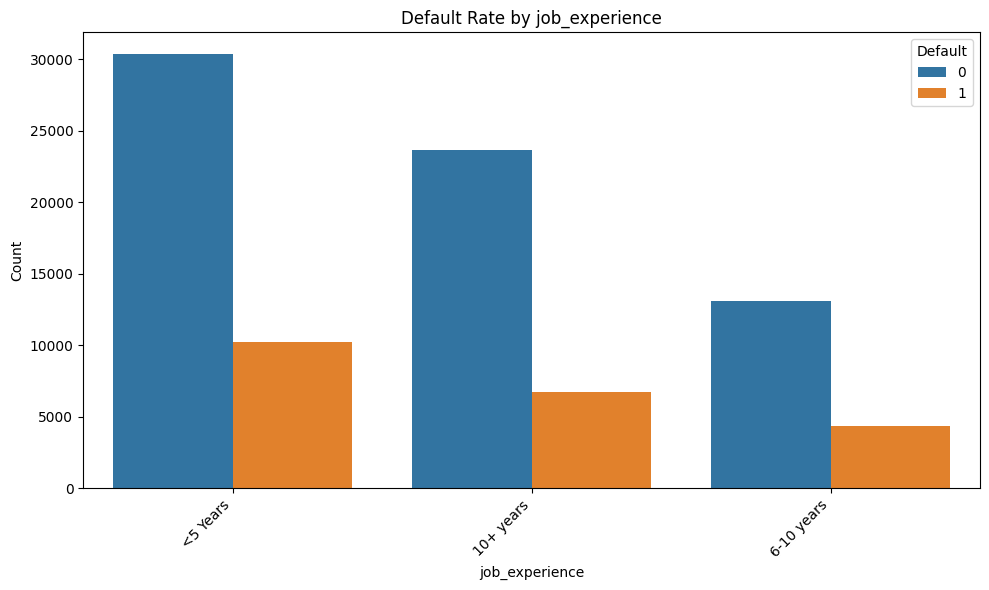

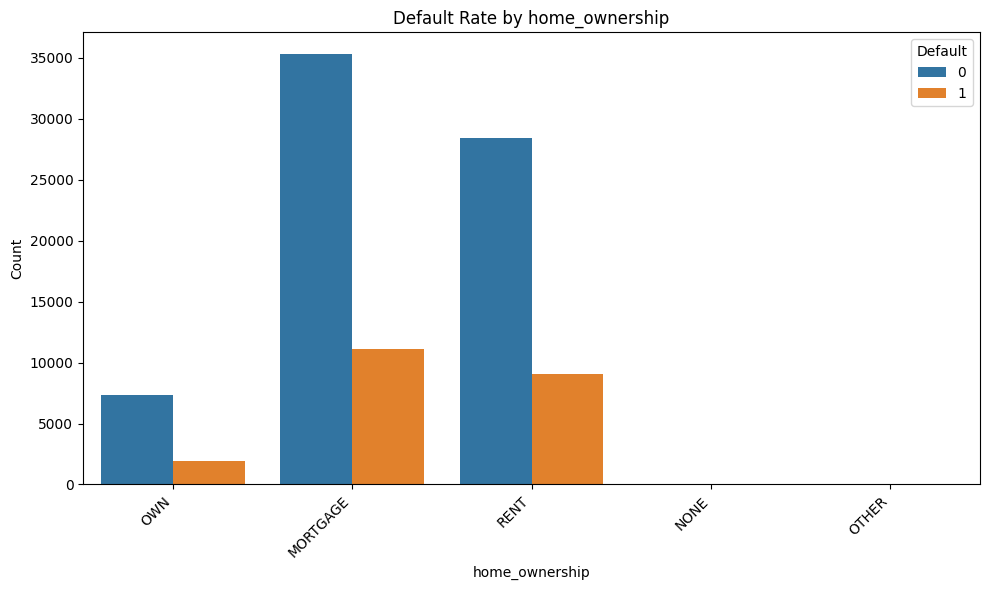

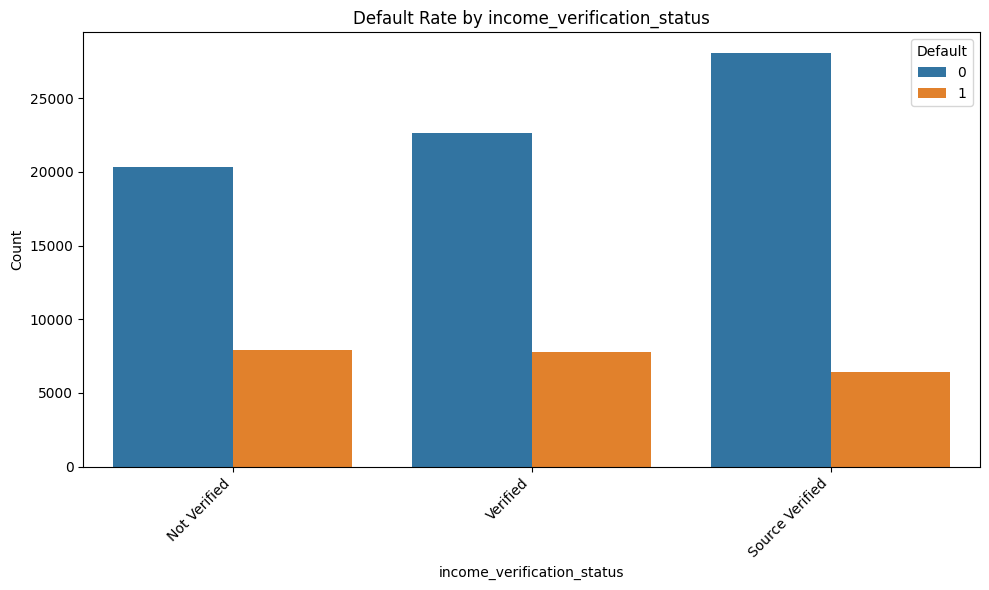

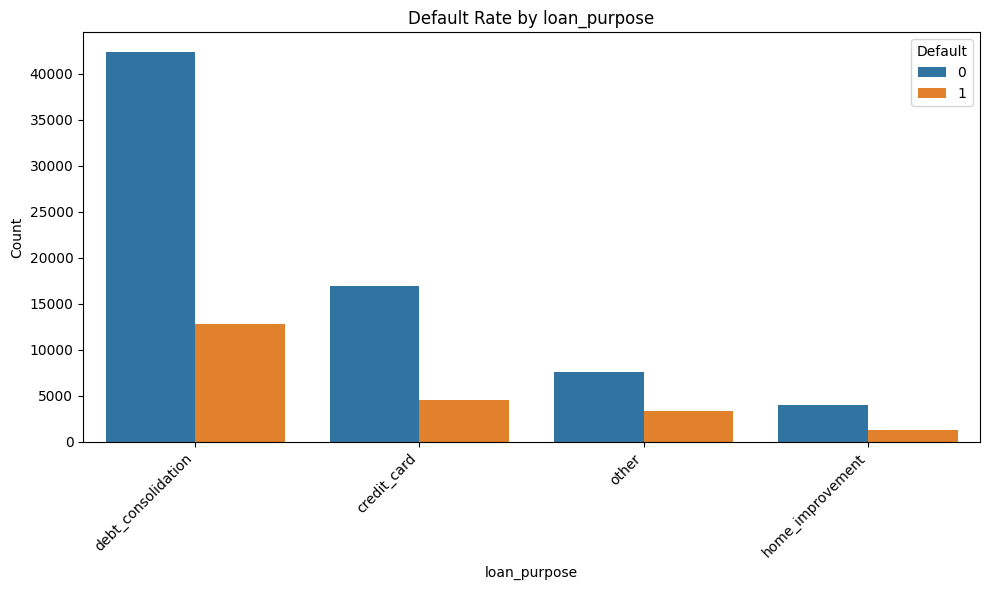

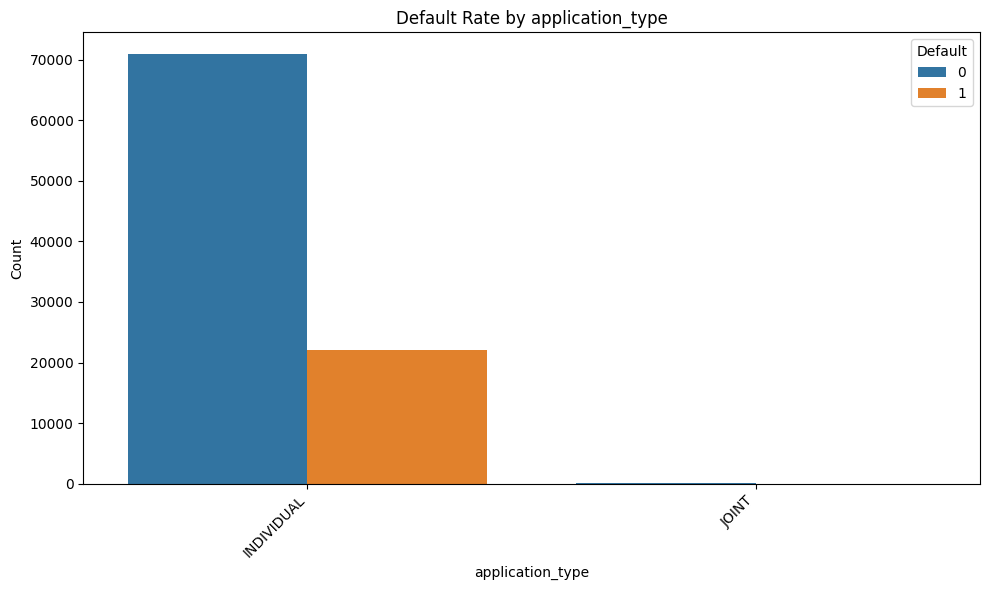

In [ ]:
print("\nCorrelation matrix for numerical features in train_df:")
numerical_cols_corr = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('ID')
correlation_matrix = train_df[numerical_cols_corr].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\nRelationship between categorical features and the target variable in train_df:")
for col in categorical_cols:
    if train_df[col].nunique() < 20: # Limit to columns with fewer than 20 unique values for readability
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='default', data=train_df)
        plt.title(f'Default Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Default')
        plt.tight_layout()
        plt.show()

## Handle missing values and outliers

### Subtask:
Address missing values using appropriate techniques (e.g., imputation) and handle outliers identified during EDA.


**Reasoning**:
Impute missing values in columns with a small percentage of missing values using the median, and for columns with a higher percentage, impute with median or consider dropping based on EDA findings. Address outliers using capping for numerical features with skewed distributions.



In [ ]:
# Impute missing values

# Columns with a small percentage of missing values (impute with median)
cols_small_missing = ['annual_income', 'delinq_2yrs', 'public_records', 'total_acc']
for col in cols_small_missing:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

# Columns with a higher percentage of missing values
# Based on EDA, 'job_experience' has a significant number of missing values and might not be a strong predictor.
# 'last_week_pay', 'total_current_balance', and 'total_revolving_limit' also have missing values but are likely important features.
# Imputing 'job_experience' with a placeholder like -1 or 'Unknown' might be an option, but given the numerical nature, median imputation is safer.
# For the other columns, median imputation is a reasonable strategy given the distributions observed in EDA.

cols_high_missing = ['job_experience', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']
for col in cols_high_missing:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)


# Address outliers using capping (based on EDA observations of skewed distributions)
# Capping at the 95th percentile for right-skewed distributions

numerical_cols_outliers = ['loan_amnt', 'annual_income', 'revolving_balance', 'total_current_balance', 'total_revolving_limit', 'interest_receive']

for col in numerical_cols_outliers:
    for df in [train_df, test_df]:
        upper_cap = df[col].quantile(0.95)
        df[col] = df[col].clip(upper=upper_cap)

# Verify missing values are handled
print("\nPercentage of missing values in train_df after imputation:")
print(train_df.isnull().sum() / len(train_df) * 100)

print("\nPercentage of missing values in test_df after imputation:")
print(test_df.isnull().sum() / len(test_df) * 100)

/tmp/ipython-input-1649426367.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
/tmp/ipython-input-1649426367.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

TypeError: Cannot convert ['<5 Years' '<5 Years' '<5 Years' ... '10+ years' '<5 Years' '<5 Years'] to numeric

**Reasoning**:
The previous attempt failed because 'job_experience' is an object type column and cannot be imputed with a numerical median. I need to handle 'job_experience' separately, likely through categorical imputation, while continuing to impute the other numerical columns with their medians and apply outlier capping.



In [ ]:
# Impute missing values

# Columns with a small percentage of missing values (impute with median)
cols_small_missing_numerical = ['annual_income', 'delinq_2yrs', 'public_records', 'total_acc']
for col in cols_small_missing_numerical:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

# Columns with a higher percentage of missing values
# 'job_experience' is categorical, impute with the mode
train_df['job_experience'] = train_df['job_experience'].fillna(train_df['job_experience'].mode()[0])
test_df['job_experience'] = test_df['job_experience'].fillna(test_df['job_experience'].mode()[0])

# Numerical columns with a higher percentage of missing values (impute with median)
cols_high_missing_numerical = ['last_week_pay', 'total_current_balance', 'total_revolving_limit']
for col in cols_high_missing_numerical:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())


# Address outliers using capping (based on EDA observations of skewed distributions)
# Capping at the 95th percentile for right-skewed distributions

numerical_cols_outliers = ['loan_amnt', 'annual_income', 'revolving_balance', 'total_current_balance', 'total_revolving_limit', 'interest_receive']

for col in numerical_cols_outliers:
    for df in [train_df, test_df]:
        upper_cap = df[col].quantile(0.95)
        df[col] = df[col].clip(upper=upper_cap)

# Verify missing values are handled
print("\nPercentage of missing values in train_df after imputation:")
print(train_df.isnull().sum() / len(train_df) * 100)

print("\nPercentage of missing values in test_df after imputation:")
print(test_df.isnull().sum() / len(test_df) * 100)


Percentage of missing values in train_df after imputation:
ID                            0.0
loan_amnt                     0.0
loan_term                     0.0
interest_rate                 0.0
loan_grade                    0.0
loan_subgrade                 0.0
job_experience                0.0
home_ownership                0.0
annual_income                 0.0
income_verification_status    0.0
loan_purpose                  0.0
state_code                    0.0
debt_to_income                0.0
delinq_2yrs                   0.0
public_records                0.0
revolving_balance             0.0
total_acc                     0.0
interest_receive              0.0
application_type              0.0
last_week_pay                 0.0
total_current_balance         0.0
total_revolving_limit         0.0
default                       0.0
dtype: float64

Percentage of missing values in test_df after imputation:
ID                            0.0
loan_amnt                     0.0
loan_term       

## Feature engineering

### Subtask:
Create new features that could potentially improve model performance. This might involve transforming existing features or creating interaction terms.


**Reasoning**:
Create new features 'loan_to_income_ratio', 'revolving_utilization', and 'debt_to_loan_ratio', handling potential division by zero.



In [ ]:
import numpy as np

# Create 'loan_to_income_ratio'
train_df['loan_to_income_ratio'] = np.where(train_df['annual_income'] != 0,
                                            train_df['loan_amnt'] / train_df['annual_income'], 0)
test_df['loan_to_income_ratio'] = np.where(test_df['annual_income'] != 0,
                                           test_df['loan_amnt'] / test_df['annual_income'], 0)

# Create 'revolving_utilization'
train_df['revolving_utilization'] = np.where(train_df['total_revolving_limit'] != 0,
                                             train_df['revolving_balance'] / train_df['total_revolving_limit'], 0)
test_df['revolving_utilization'] = np.where(test_df['total_revolving_limit'] != 0,
                                            test_df['revolving_balance'] / test_df['total_revolving_limit'], 0)

# Create 'debt_to_loan_ratio' (Debt-to-Income is % so divide by 100)
train_df['debt_to_loan_ratio'] = np.where(
    (train_df['loan_amnt'] != 0) & (train_df['annual_income'] != 0),
    (train_df['debt_to_income'] / 100) * (train_df['annual_income'] / train_df['loan_amnt']),
    0
)

test_df['debt_to_loan_ratio'] = np.where(
    (test_df['loan_amnt'] != 0) & (test_df['annual_income'] != 0),
    (test_df['debt_to_income'] / 100) * (test_df['annual_income'] / test_df['loan_amnt']),
    0
)


**Reasoning**:
Consider creating interaction terms and a time-based feature if relevant columns exist, then drop original features that are no longer needed.



In [ ]:
# No obvious features for interaction terms or a direct time-based feature like 'age of loan in weeks'
# based on the available columns.

# Drop original features that were directly used to create ratios if they are no longer needed.
# Keeping the original columns for now as they might still be useful individually or in other interactions.
# Will revisit dropping features after further analysis or model training.

print("Train DataFrame columns after feature engineering:")
print(train_df.columns)
print("\nTest DataFrame columns after feature engineering:")
print(test_df.columns)

Train DataFrame columns after feature engineering:
Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default',
       'loan_to_income_ratio', 'revolving_utilization', 'debt_to_loan_ratio'],
      dtype='object')

Test DataFrame columns after feature engineering:
Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_

## Handle skewness

### Subtask:
Address skewed features using transformations like log transformation or box-cox transformation.


**Reasoning**:
Identify and transform skewed numerical features using appropriate methods and visualize the distributions before and after transformation.



Applied log transformation to loan_amnt
Applied log transformation to annual_income
Applied Box-Cox transformation to revolving_balance with lambda=0.3553
Applied Box-Cox transformation to total_current_balance with lambda=0.1949
Applied Box-Cox transformation to total_revolving_limit with lambda=0.2650
Applied Box-Cox transformation to interest_receive with lambda=0.2919
Applied Box-Cox transformation to last_week_pay with lambda=0.3372
Applied log transformation to loan_to_income_ratio
Applied Box-Cox transformation to revolving_utilization with lambda=0.7331
Applied Box-Cox transformation to debt_to_loan_ratio with lambda=0.1259

Distributions of transformed numerical features in train_df:


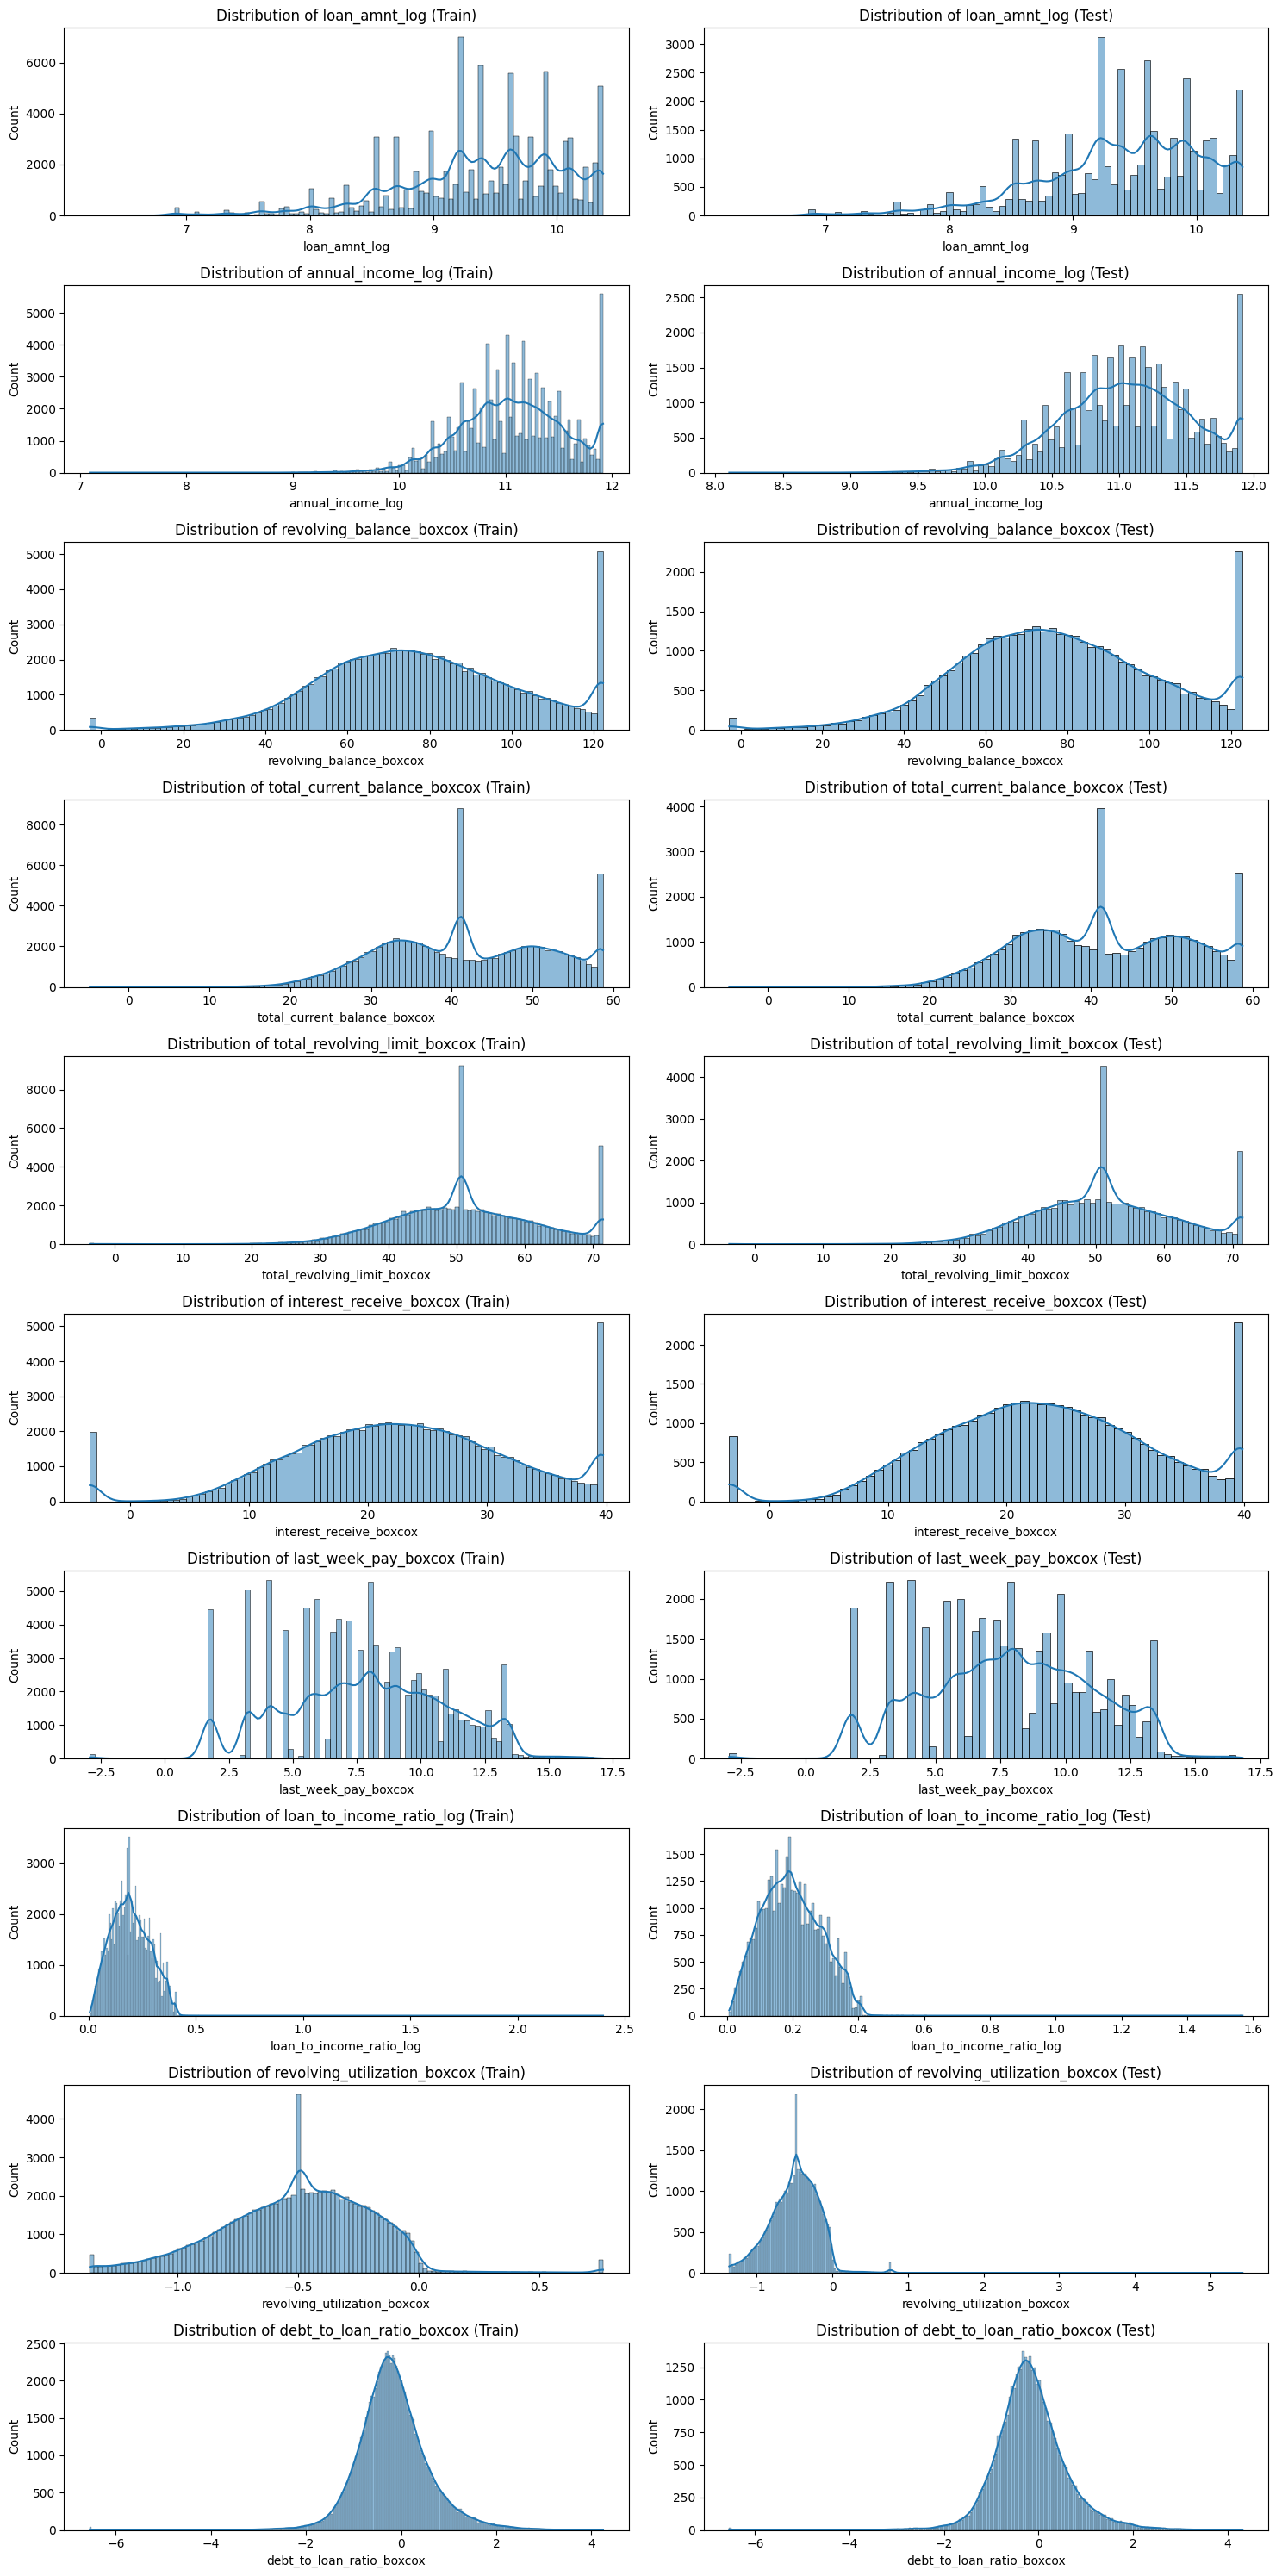

In [ ]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# Identify skewed numerical features based on EDA (histograms)
# From the EDA, features like 'loan_amnt', 'annual_income', 'revolving_balance',
# 'total_current_balance', 'total_revolving_limit', 'interest_receive', 'last_week_pay',
# 'loan_to_income_ratio', 'revolving_utilization', and 'debt_to_loan_ratio'
# appear to be skewed.

numerical_cols_skewed = [
    'loan_amnt', 'annual_income', 'revolving_balance',
    'total_current_balance', 'total_revolving_limit', 'interest_receive',
    'last_week_pay', 'loan_to_income_ratio', 'revolving_utilization',
    'debt_to_loan_ratio'
]

# Apply transformations
for col in numerical_cols_skewed:
    # Check if all values are positive for log transformation
    if (train_df[col] > 0).all() and (test_df[col] > 0).all():
        # Use log transformation (add a small constant to handle zero if any slipped through)
        train_df[col + '_log'] = np.log1p(train_df[col])
        test_df[col + '_log'] = np.log1p(test_df[col])
        print(f"Applied log transformation to {col}")
    else:
        # Use Box-Cox transformation (requires positive data, add a small constant if needed)
        # Find the optimal lambda for Box-Cox on the training data
        # Add a small constant if there are zero or negative values for Box-Cox
        train_col_positive = train_df[col] + 1e-6
        test_col_positive = test_df[col] + 1e-6

        # Apply Box-Cox only if there's variation in the data
        if train_col_positive.nunique() > 1:
            transformed_train, lambda_val = boxcox(train_col_positive)
            train_df[col + '_boxcox'] = transformed_train
            # Apply the same lambda to the test data
            test_df[col + '_boxcox'] = boxcox(test_col_positive, lmbda=lambda_val)
            print(f"Applied Box-Cox transformation to {col} with lambda={lambda_val:.4f}")
        else:
            print(f"Skipped Box-Cox transformation for {col} due to lack of variation.")


# Verify distributions after transformation
print("\nDistributions of transformed numerical features in train_df:")
transformed_cols = [col for col in train_df.columns if '_log' in col or '_boxcox' in col]

plt.figure(figsize=(15, len(transformed_cols) * 3))
for i, col in enumerate(transformed_cols):
    plt.subplot(len(transformed_cols), 2, 2 * i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Train)')

    plt.subplot(len(transformed_cols), 2, 2 * i + 2)
    sns.histplot(test_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col} (Test)')

plt.tight_layout()
plt.show()

## Categorical encoding

### Subtask:
Encode categorical features using appropriate techniques like one-hot encoding or label encoding, considering the nature of each feature and the chosen models.


**Reasoning**:
Identify categorical columns and apply one-hot encoding to those with a small number of unique values in both training and test dataframes.



In [ ]:
!pip install category_encoders

In [ ]:
print(train_df['loan_subgrade'].unique()[:50])


In [ ]:
train_df['loan_subgrade']

,loan_subgrade
0,7
1,11
2,4
3,14
4,2
...,...
93169,4
93170,1
93171,13
93172,16


In [ ]:
train_df['curr']

In [ ]:
import pandas as pd
from category_encoders import TargetEncoder

# ----------------- CLEAN COLUMN NAMES -----------------
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# ----------------- LABEL ENCODING -----------------
# Ordinal columns
label_cols = ['loan_term', 'loan_grade', 'job_experience',
              'income_verification_status', 'application_type']

# Manual mapping for loan_grade (ordinal)
loan_grade_order = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
train_df['loan_grade'] = train_df['loan_grade'].map(loan_grade_order)
test_df['loan_grade'] = test_df['loan_grade'].map(loan_grade_order)

# Label encoding for other ordinal/binary features
for col in ['loan_term', 'job_experience', 'income_verification_status', 'application_type']:
    train_df[col] = train_df[col].astype('category').cat.codes
    test_df[col] = test_df[col].astype('category').cat.codes

# ----------------- ONE-HOT ENCODING -----------------
one_hot_cols = ['home_ownership', 'loan_purpose']
# Only encode columns that exist
one_hot_cols = [col for col in one_hot_cols if col in train_df.columns]
train_df = pd.get_dummies(train_df, columns=one_hot_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=one_hot_cols, drop_first=True)

# Ensure test_df has same columns as train_df
for col in train_df.columns:
    if col not in test_df.columns:
        test_df[col] = 0
test_df = test_df[train_df.columns.drop('default')]  # drop target from train if exists

# ----------------- TARGET / FREQUENCY ENCODING -----------------
target_col = 'default'  # your target
high_card_cols = ['loan_subgrade', 'state_code']

# Use frequency encoding to avoid target if needed
for col in high_card_cols:
    freq_enc = train_df[col].value_counts() / len(train_df)
    train_df[col] = train_df[col].map(freq_enc)
    test_df[col] = test_df[col].map(freq_enc)
    test_df[col] = test_df[col].fillna(0)  # unseen categories in test



**Reasoning**:
Verify if there are any remaining categorical columns with a large number of unique values and decide on the appropriate encoding strategy or drop them if they are not suitable for modeling. Based on the column names printed, 'loan_subgrade' and 'state_code' are the remaining object columns. Since 'state_code' has too many unique values and 'loan_subgrade' might have an inherent order, let's examine their unique values to decide.



In [ ]:
print("\nUnique values and counts for remaining categorical columns in train_df:")
remaining_categorical_cols = train_df.select_dtypes(include='object').columns
for col in remaining_categorical_cols:
    print(f"\nColumn: {col}")
    display(train_df[col].value_counts())


Unique values and counts for remaining categorical columns in train_df:


**Reasoning**:
Based on the previous output, 'loan_subgrade' has a moderate number of unique values which have an inherent order (A1 is better than A2, B1 better than B2, etc.). Label encoding can be used here. 'state_code' has a very high number of unique values, and one-hot encoding would create too many features. Given the large number of states and the goal of the task, dropping this column might be the most practical approach for this subtask.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'loan_subgrade' as it has an ordinal nature
le = LabelEncoder()
train_df['loan_subgrade_encoded'] = le.fit_transform(train_df['loan_subgrade'])
test_df['loan_subgrade_encoded'] = le.transform(test_df['loan_subgrade']) # Use the same encoder fitted on train_df

# Drop the original 'loan_subgrade' and 'state_code' columns
train_df = train_df.drop(['loan_subgrade', 'state_code'], axis=1)
test_df = test_df.drop(['loan_subgrade', 'state_code'], axis=1)

# Verify remaining categorical columns (should be none)
print("\nRemaining categorical columns in train_df after encoding and dropping:")
print(train_df.select_dtypes(include='object').columns)

print("\nTrain DataFrame shape after final encoding and dropping:", train_df.shape)
print("Test DataFrame shape after final encoding and dropping:", test_df.shape)

## Preprocessing pipeline

### Subtask:
Create a preprocessing pipeline to apply all the preprocessing steps consistently to both training and testing data. Store this pipeline as a `.pkl` file.


**Reasoning**:
Create and fit the preprocessing pipeline, then save it to a file.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Identify numerical features (excluding target)
num_cols = train_df.drop('default', axis=1).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), num_cols)
    ],
    remainder='passthrough'  # already-encoded categorical features pass through
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit pipeline on train data
pipeline.fit(train_df.drop('default', axis=1))

# Transform train and test
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Save pipeline
joblib.dump(pipeline, 'preprocessing.pkl')
print("✅ Preprocessing pipeline with missing value imputation saved successfully.")


✅ Preprocessing pipeline with missing value imputation saved successfully.


## Model selection

### Subtask:
Select a variety of classification models suitable for this problem.


**Reasoning**:
Select a diverse set of classification models suitable for the dataset characteristics and the class imbalance.



In [ ]:
!pip install catboost

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Rationale for model selection:
# 1. Logistic Regression: A simple yet effective baseline model, good for understanding feature importance.
# 2. Random Forest: An ensemble tree-based model that handles non-linearity and interactions well, less prone to overfitting than single trees.
# 3. Gradient Boosting (e.g., GradientBoostingClassifier): Another powerful ensemble tree-based model known for high performance, can capture complex relationships.
# 4. Support Vector Machine (SVM): Effective in high-dimensional spaces, can use different kernels to capture non-linear relationships. May be slower on large datasets.
# 5. K-Nearest Neighbors (KNN): A simple instance-based learning algorithm. Performance can be sensitive to scaling and the choice of k.

# List of chosen models (will instantiate later during training/tuning)
chosen_models = [
    'LogisticRegression',
    'RandomForestClassifier',
    'GradientBoostingClassifier',
    'ExtraTreesClassifier',
    'AdaBoostClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'CatBoostClassifier',
    'KNeighborsClassifier'
]

print("Selected classification models:")
for model_name in chosen_models:
    print(f"- {model_name}")

Selected classification models:
- LogisticRegression
- RandomForestClassifier
- GradientBoostingClassifier
- ExtraTreesClassifier
- AdaBoostClassifier
- XGBClassifier
- LGBMClassifier
- CatBoostClassifier
- KNeighborsClassifier


## Model training

### Subtask:
Train the selected classification models on the preprocessed training data.


**Reasoning**:
Load the preprocessing pipeline, separate features and target, instantiate the selected models, train them using the preprocessed training data, and store the trained models.



In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# ----------------- DATA SPLIT -----------------
X = train_df.drop('default', axis=1)
y = train_df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------- LOAD PREPROCESSOR -----------------
pipeline = joblib.load('preprocessing.pkl')

X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

# ----------------- BALANCE TRAINING DATA (SMOTE for non-tree models) -----------------
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)
# ----------------- MODELS -----------------
models = {
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear'),
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced', random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'ExtraTreesClassifier': ExtraTreesClassifier(class_weight='balanced', random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'CatBoostClassifier': CatBoostClassifier(random_state=42, verbose=0, class_weights={0:1, 1:3}),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])
    ),
    'LGBMClassifier': LGBMClassifier(
        random_state=42,
        scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])
    )
}

# ----------------- TRAIN & EVALUATE -----------------
trained_models = {}
print("\nTraining & Evaluating Models...\n")

for name, model in models.items():
    print(f"🔹 Training {name}...")

    # Use SMOTE-balanced data for models that need it (non-tree models)
    if name in ['LogisticRegression', 'KNeighborsClassifier']:
        model.fit(X_train_bal, y_train_bal)
    else:
        model.fit(X_train_processed, y_train)

    trained_models[name] = model

    # Predictions
    y_pred = model.predict(X_test_processed)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # AUC (for classifiers with predict_proba support)
    try:
        auc = roc_auc_score(y_test, model.predict_proba(X_test_processed)[:, 1])
    except:
        auc = "N/A (no predict_proba)"

    print(f"\n📊 Performance of {name}:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"AUC Score    : {auc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*60)

print("\n✅ All models trained and evaluated successfully.")



Training & Evaluating Models...

🔹 Training LogisticRegression...

📊 Performance of LogisticRegression:
Accuracy     : 0.7489
Precision    : 0.4821
Recall       : 0.7714
F1 Score     : 0.5933
AUC Score    : 0.818968788739862

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     14209
           1       0.48      0.77      0.59      4426

    accuracy                           0.75     18635
   macro avg       0.70      0.76      0.71     18635
weighted avg       0.81      0.75      0.76     18635

Confusion Matrix:
[[10541  3668]
 [ 1012  3414]]
🔹 Training RandomForestClassifier...

📊 Performance of RandomForestClassifier:
Accuracy     : 0.8911
Precision    : 0.8330
Recall       : 0.6774
F1 Score     : 0.7472
AUC Score    : 0.9493156549359623

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     14209
           1       0.83      0.68      0

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:38:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Performance of XGBClassifier:
Accuracy     : 0.9144
Precision    : 0.7660
Recall       : 0.9207
F1 Score     : 0.8362
AUC Score    : 0.9584552610555284

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     14209
           1       0.77      0.92      0.84      4426

    accuracy                           0.91     18635
   macro avg       0.87      0.92      0.89     18635
weighted avg       0.92      0.91      0.92     18635

Confusion Matrix:
[[12964  1245]
 [  351  4075]]
🔹 Training LGBMClassifier...
[LightGBM] [Info] Number of positive: 17703, number of negative: 56836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5711
[LightGBM] [Info] Number of data points in the train set: 74539, number of used featu

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 Performance of LGBMClassifier:
Accuracy     : 0.9134
Precision    : 0.7602
Recall       : 0.9284
F1 Score     : 0.8359
AUC Score    : 0.9605727605865277

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14209
           1       0.76      0.93      0.84      4426

    accuracy                           0.91     18635
   macro avg       0.87      0.92      0.89     18635
weighted avg       0.92      0.91      0.92     18635

Confusion Matrix:
[[12913  1296]
 [  317  4109]]

✅ All models trained and evaluated successfully.


## Hyperparameter tuning

### Subtask:
Select the top 3 performing models and tune their hyperparameters to optimize performance.


**Reasoning**:
Select the top 3 models to tune based on the previous training step and define the hyperparameter grids for each.



In [ ]:
import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ----------------- LOAD PREPROCESSOR -----------------
pipeline = joblib.load("preprocessing.pkl")
X_train_processed = pipeline.transform(X_train)
X_test_processed = pipeline.transform(X_test)

# ----------------- BALANCE TRAINING DATA (SMOTE for non-tree models) -----------------
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

# ----------------- MODELS TO TUNE -----------------
models_to_tune = {
    'CatBoost': CatBoostClassifier(loss_function='Logloss', verbose=0, random_seed=42, class_weights={0:1,1:3}),
    'XGBoost': XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss', tree_method='hist', scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
    'LightGBM': LGBMClassifier(objective='binary', boosting_type='gbdt', random_state=42, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# ----------------- PARAM GRIDS -----------------
param_grids = {
    'CatBoost': {
        'iterations': [400, 600, 800],
        'learning_rate': [0.03, 0.05, 0.07],
        'depth': [6, 8, 10],
        'l2_leaf_reg': [1, 3, 5]
    },
    'XGBoost': {
        'n_estimators': [300, 500, 700],
        'learning_rate': [0.03, 0.05, 0.07],
        'max_depth': [4, 6, 8],
        'gamma': [0, 1, 5],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [300, 500, 700],
        'learning_rate': [0.03, 0.05, 0.07],
        'num_leaves': [31, 63, 127],
        'min_child_samples': [10, 20, 40],
        'subsample': [0.7, 0.8, 1.0]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.03, 0.05, 0.07],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.7, 0.8, 1.0]
    }
}

# ----------------- RANDOMIZED SEARCH -----------------
best_models = {}
scores = {}

print("🚀 Starting RandomizedSearchCV for top 4 models...")

for name, model in models_to_tune.items():
    print(f"\n🔄 Tuning {name}...")

    # Use SMOTE for non-tree boosting models (optional, can skip for GradientBoosting, XGB, LGBM, CatBoost)
    X_train_use, y_train_use = X_train_processed, y_train
    if name == 'GradientBoosting':
        X_train_use, y_train_use = X_train_processed, y_train  # GradientBoosting can work without SMOTE
    elif name == 'CatBoost':
        X_train_use, y_train_use = X_train_processed, y_train  # CatBoost can handle imbalance via class_weights

    tuner = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=5,
        scoring='f1',
        cv=3,
        n_jobs=-1,
        verbose=0,
        random_state=42
    )

    tuner.fit(X_train_use, y_train_use)

    best_models[name] = tuner.best_estimator_
    scores[name] = tuner.best_score_

    print(f"✅ Best Params for {name}: {tuner.best_params_}")
    print(f"🎯 Best CV F1 Score: {tuner.best_score_:.4f}")

# ----------------- SELECT BEST MODEL -----------------
best_model_name = max(scores, key=scores.get)
best_model = best_models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")

# ----------------- TEST PERFORMANCE -----------------
preds = best_model.predict(X_test_processed)
from sklearn.metrics import classification_report, accuracy_score
print(f"\n📌 TEST PERFORMANCE ({best_model_name})")
print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
print(classification_report(y_test, preds))

# ----------------- SAVE BEST MODEL -----------------
joblib.dump(best_model, "best_model_top4.pkl")
print("💾 Saved Best Model → best_model_top4.pkl")


🚀 Starting RandomizedSearchCV for top 4 models...

🔄 Tuning CatBoost...
✅ Best Params for CatBoost: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 800, 'depth': 6}
🎯 Best CV F1 Score: 0.8247

🔄 Tuning XGBoost...
✅ Best Params for XGBoost: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.7}
🎯 Best CV F1 Score: 0.8255

🔄 Tuning LightGBM...
[LightGBM] [Info] Number of positive: 17703, number of negative: 56836
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5713
[LightGBM] [Info] Number of data points in the train set: 74539, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237500 -> initscore=-1.166436
[LightGBM] [Info] Start training from score -1.166436
✅ Best Params for LightGBM: {

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📌 TEST PERFORMANCE (LightGBM)
Accuracy: 0.9129
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14209
           1       0.76      0.93      0.84      4426

    accuracy                           0.91     18635
   macro avg       0.87      0.92      0.89     18635
weighted avg       0.92      0.91      0.92     18635

💾 Saved Best Model → best_model_top4.pkl


**Reasoning**:
Perform GridSearchCV for each of the top 3 models using the defined parameter grids and the preprocessed training data. Then train the models with the best parameters.



In [ ]:
import pandas as pd
import joblib

# ---------------- LOAD PREPROCESSOR & FINAL MODEL ----------------
print("\n🔄 Loading Preprocessor & Final Model...")
preprocessor = joblib.load("/content/preprocessing.pkl")        # or preprocessor_pipeline.pkl if that’s your filename
best_model = joblib.load("/content/best_model_top4.pkl")     # your tuned best XGBoost model

# ---------------- PREPROCESS TEST DATA ----------------
print("⚙️ Transforming test data...")
X_test_processed = preprocessor.transform(test_df)

# ---------------- MAKE PREDICTIONS ----------------
print("\n🧠 Generating predictions on test data...")
y_test_pred = best_model.predict(X_test_processed)   # Already outputs 0/1




🔄 Loading Preprocessor & Final Model...
⚙️ Transforming test data...

🧠 Generating predictions on test data...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import joblib

# Load
print("\n🔄 Loading Preprocessor & Final Model...")
preprocessor = joblib.load("/content/preprocessing.pkl")
best_model = joblib.load("/content/best_model_top4.pkl")

# Transform test data (DO NOT DROP ID HERE)
print("⚙️ Transforming test data...")
X_test_processed = preprocessor.transform(test_df)

# Predict
print("\n🧠 Generating predictions on test data...")
y_test_pred = best_model.predict(X_test_processed)

# Create submission
submission = pd.DataFrame({
    "ID": test_df["ID"],
    "default": y_test_pred.astype(int)
})

# Validate
expected_rows = test_df.shape[0]
expected_columns = ["ID", "default"]

if submission.shape[0] != expected_rows:
    raise ValueError(f"❌ Expected {expected_rows} rows, but got {submission.shape[0]}.")
if list(submission.columns) != expected_columns:
    raise ValueError(f"❌ Expected columns {expected_columns}, but got {list(submission.columns)}.")
if submission.isnull().any().any():
    raise ValueError("❌ Submission file contains missing values!")

# Save
submission.to_csv("submission.csv", index=False)

print("\n✅ Submission file saved successfully as 'submission.csv'")
print(f"📊 Shape: {submission.shape}")
print(f"📈 Default Value Distribution:\n{submission['default'].value_counts()}")



🔄 Loading Preprocessor & Final Model...
⚙️ Transforming test data...

🧠 Generating predictions on test data...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✅ Submission file saved successfully as 'submission.csv'
📊 Shape: (39933, 2)
📈 Default Value Distribution:
default
0    27950
1    11983
Name: count, dtype: int64
